In [1]:
from sklearn import datasets 
import pandas as pd 
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/Fox/Desktop/Data Science/Capstone/Codes/EDA-Siqi/EDA.csv', index_col=0)
data

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,VideoAmt,PhotoAmt,AdoptionSpeed,AgeBins,Pure_breed,Free_or_NeedFee
0,0,167,0,1,0,6,0,3,2,0,0,0,0,0,0,1,2,0,1,1
1,0,136,0,1,0,1,0,2,1,1,1,1,0,0,0,2,4,0,1,0
2,1,175,0,1,1,6,0,2,1,2,2,0,0,0,0,7,1,0,1,0
3,1,175,0,0,0,1,0,2,2,2,2,0,0,0,0,8,2,0,1,1
4,1,175,0,1,0,0,0,2,2,0,0,0,0,0,0,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,1,89,0,0,0,6,0,3,0,2,2,0,0,0,0,1,4,1,1,0
14988,0,137,0,2,0,0,0,2,1,0,0,0,0,3,0,3,2,0,1,0
14989,0,136,100,2,0,3,5,2,1,2,2,2,0,1,0,3,3,4,0,0
14990,0,136,102,2,4,5,5,1,1,0,2,1,0,4,0,5,1,0,0,1


In [25]:
df0 = pd.DataFrame(data) 

In [26]:
# Drop Breed1 Breed2
df = df0[['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed', 'AgeBins',
       'Pure_breed', 'Free_or_NeedFee']]
X = df0[['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'VideoAmt', 'PhotoAmt', 'AgeBins',
       'Pure_breed', 'Free_or_NeedFee']]

In [27]:
y = np.array(df0['AdoptionSpeed'])

In [35]:
data_matrix = xgb.DMatrix(X,y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [37]:
xg_reg= xgb.XGBRegressor(
    objective='reg:linear',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=10,
    alpha=10
)
xg_reg.fit(X_train,y_train)
pred = xg_reg.predict(X_test)
mean_squared_error(pred,y_test)

[18:35:04] WARNING: src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


1.47434282020014

In [38]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[18:35:04] WARNING: src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:04] WARNING: src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:04] WARNING: src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.590407,0.002567,1.590519,0.005298
1,1.518093,0.002542,1.518397,0.005344
2,1.454842,0.003538,1.455056,0.004545
3,1.401642,0.003846,1.402189,0.004500
4,1.355701,0.003717,1.356342,0.004531


In [39]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1.124194
Name: test-rmse-mean, dtype: float64


[18:35:05] WARNING: src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


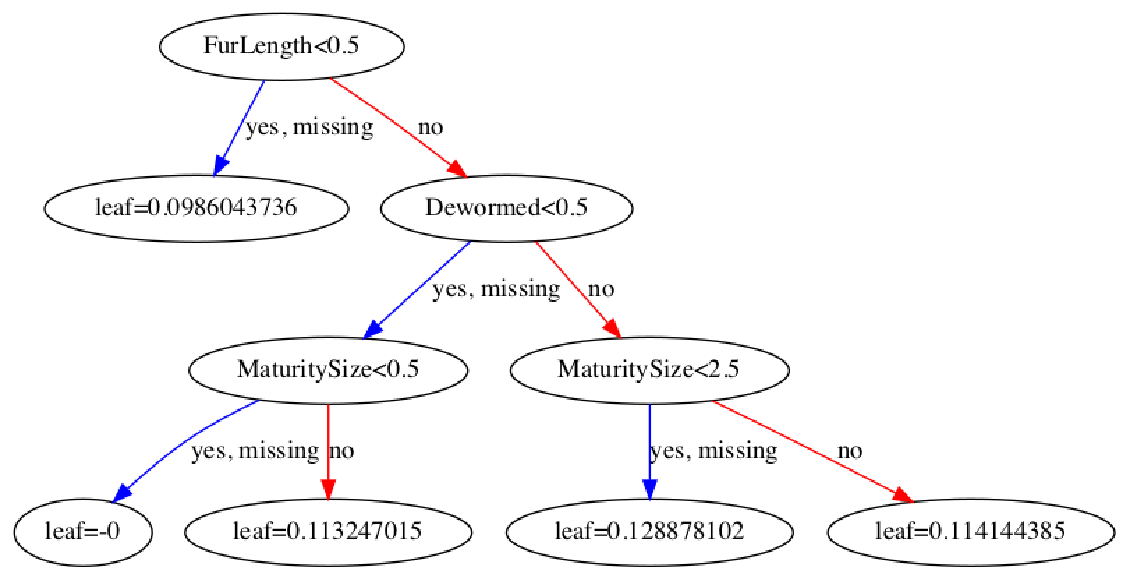

In [40]:
xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [80, 60]
plt.show()

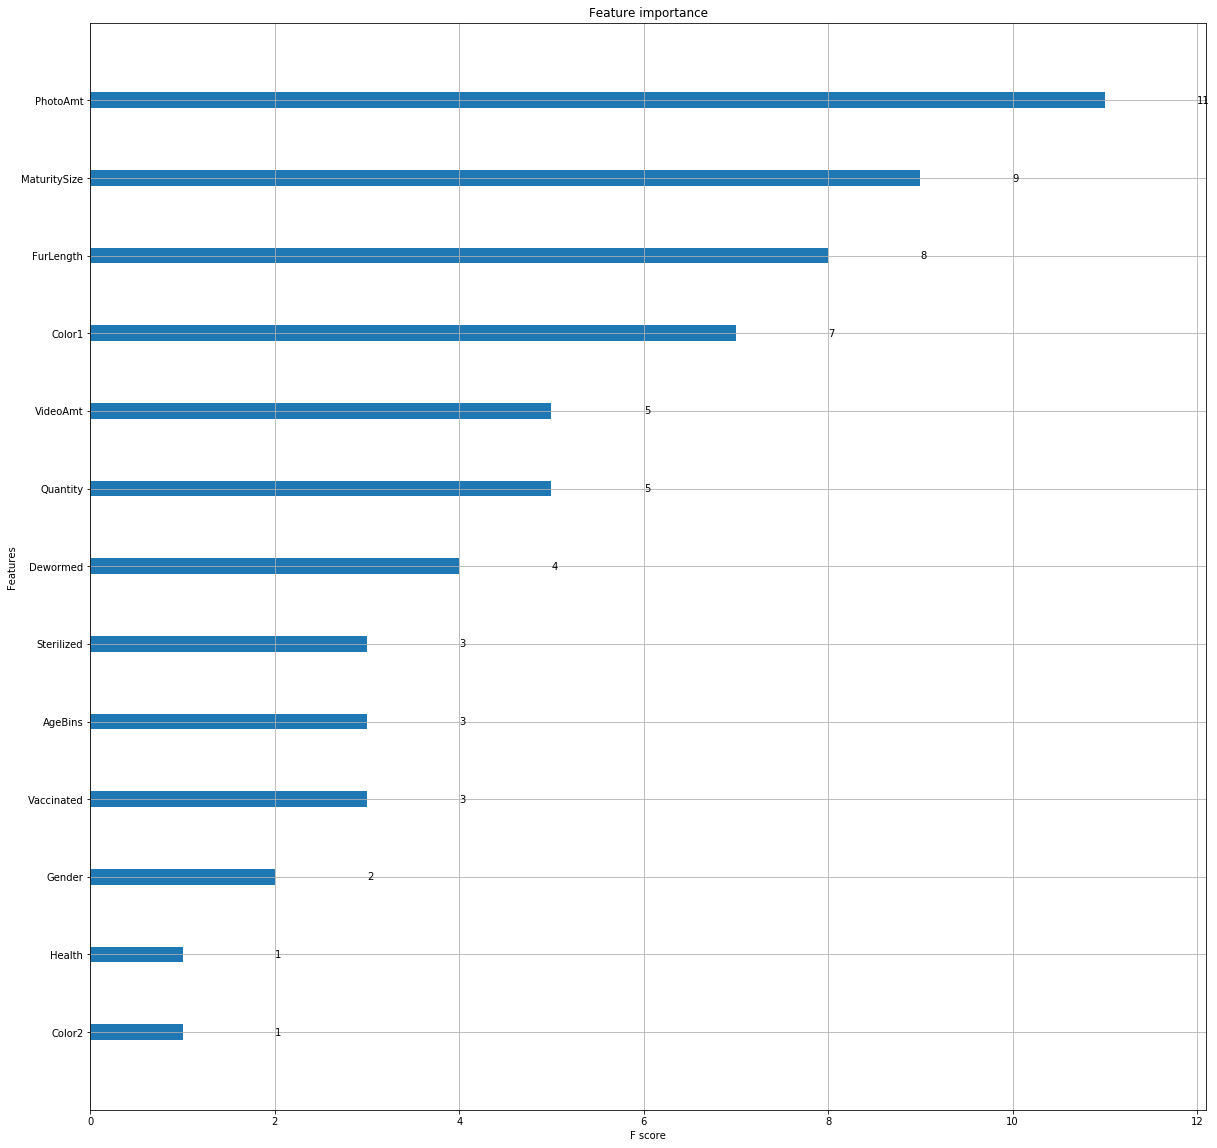

In [41]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()